<a href="https://colab.research.google.com/github/Tomokki/private_Python-.gitkeep/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92_Pycaret_%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#より自動化しやすくしたものがPycaret

In [ ]:
!pip install pycaret

In [3]:
from pycaret.regression import*
from pycaret.datasets import get_data

In [4]:
dataset = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
exp = setup(dataset,target="Price")
# Priceの値を予想する
# datasetのPriceをtargetにする
# この段階で前処理がsetupされている

,Description,Value
0,Session id,326
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


##モデリング

In [7]:
compare_models()
# これだけでアルゴリズムの比較ができている！
# R2行（決定係数）が高い順に並んでいるのがわかる
#"Extreme Gradient Boosting"というアルゴリズムでの結果が一番良かった


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,668.2228,1823234.8803,1332.4975,0.9819,0.0704,0.0524,0.2530
et,Extra Trees Regressor,711.7522,1986308.7961,1374.8823,0.9804,0.0773,0.0574,1.7460
rf,Random Forest Regressor,719.7882,2298915.3958,1486.9637,0.9772,0.0769,0.0566,1.5680
lightgbm,Light Gradient Boosting Machine,735.9800,2793322.8888,1617.3578,0.9729,0.0761,0.0558,0.4540
gbr,Gradient Boosting Regressor,890.9726,2990460.0440,1710.8680,0.9704,0.0994,0.0755,0.4350
dt,Decision Tree Regressor,931.4385,4195852.7539,1975.6658,0.9570,0.1011,0.0735,0.2380
ridge,Ridge Regression,2430.9057,14206140.1752,3756.4744,0.8598,0.6040,0.2849,0.1590
llar,Lasso Least Angle Regression,2433.5552,14258472.6787,3763.1956,0.8592,0.6032,0.2851,0.2320
br,Bayesian Ridge,2433.2856,14264071.5435,3763.8924,0.8592,0.6027,0.2850,0.1690
lasso,Lasso Regression,2431.2330,14269364.9054,3764.4686,0.8591,0.6004,0.2845,0.1770


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=326, ...)

In [8]:
model = create_model("et")
# 交差検証を自動で行っている！
# 10回検証して平均を出してくる！

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,694.6783,1422859.9008,1192.8369,0.9840,0.0838,0.0621
1,726.1246,1737303.5162,1318.0681,0.9801,0.0814,0.0588
2,678.6785,1428633.0925,1195.2544,0.9835,0.0739,0.0558
3,833.6122,4920408.4769,2218.1994,0.9549,0.0824,0.0591
4,668.4158,1759505.1467,1326.4634,0.9824,0.0710,0.0533
5,705.5290,1735131.2107,1317.2438,0.9854,0.0785,0.0596
6,700.9947,1646769.0940,1283.2650,0.9835,0.0733,0.0546
7,684.7336,1420924.3078,1192.0253,0.9872,0.0733,0.0552
8,753.2211,2590240.5778,1609.4224,0.9751,0.0801,0.0588


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
print(model)

ExtraTreesRegressor(n_jobs=-1, random_state=326)


##ハイパーパラメータチューニング

In [10]:
tune_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,765.6907,1559350.8795,1248.7397,0.9825,0.0888,0.0686
1,850.3865,2738235.9774,1654.7616,0.9687,0.1028,0.0691
2,808.2238,1973251.7267,1404.7248,0.9772,0.0854,0.0656
3,957.1986,6154779.5492,2480.8828,0.9436,0.0965,0.0711
4,747.0496,1791944.7199,1338.6354,0.9821,0.0778,0.0593
5,842.2695,3707350.6713,1925.4482,0.9689,0.0914,0.0659
6,873.2617,2677456.8267,1636.2936,0.9732,0.0922,0.0671
7,837.4159,2958204.7765,1719.9432,0.9733,0.0910,0.0662
8,830.4964,3415060.4624,1847.9882,0.9671,0.0859,0.0643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##予測値、予測結果を見たい場合  
* 学習済モデル(test_data)で全体の3割で分けられているから1800行となっている
*  priceとLabelを比較して概ね一致している


In [12]:
predict_model(tune_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,732.0683,2280061.7946,1509.9873,0.9793,0.0771,0.0578


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
5170,1.03,Very Good,H,VS2,EX,EX,GIA,5420,5677.91
451,1.08,Ideal,D,SI1,VG,VG,GIA,6078,6203.00
1380,2.01,Ideal,I,VS2,VG,VG,GIA,16564,16591.08
3134,2.00,Ideal,E,VVS2,VG,VG,GIA,31924,35517.17
4681,1.01,Very Good,I,SI1,VG,VG,GIA,4207,4282.00
...,...,...,...,...,...,...,...,...,...
2530,0.92,Very Good,D,SI1,EX,EX,GIA,5779,4845.11
279,1.23,Very Good,G,VVS1,G,VG,GIA,10435,10635.96
3430,2.25,Ideal,G,VS1,EX,EX,GIA,29299,35267.42
211,1.52,Very Good,H,VS1,VG,VG,GIA,12877,11162.00


##結果のプロット

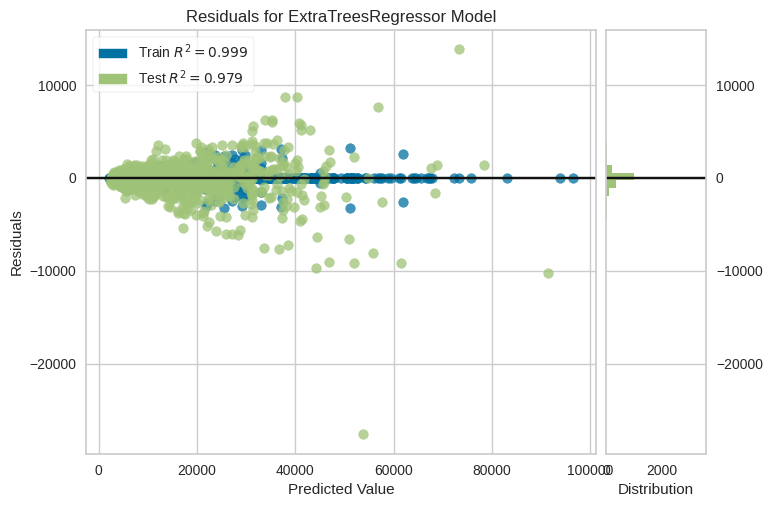

In [13]:
plot_model(tune_model)

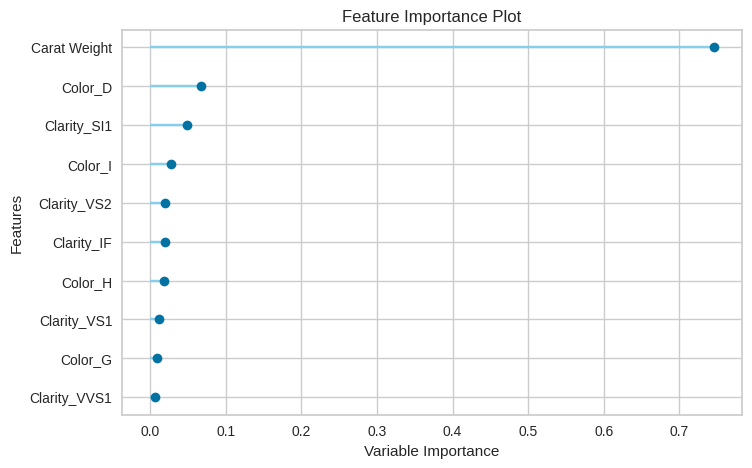

In [14]:
# 特徴量の重要度を見たい時
plot_model(tune_model, plot="feature")